# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [106]:
#Import all the necessary modules
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler,minmax_scale
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import metrics
from scipy.stats import zscore
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib import pyplot
%matplotlib inline

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


The file can be accessed directly from the URL (https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data or you may first download it to a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df


In [39]:
colnames = ['preg', 'plas', 'pres', 'skin', 'insulin', 'mass', 'pedi', 'age', 'class']
pima_df = pd.read_csv("pima-indians-diabetes.data",names=colnames)

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [40]:
pima_df.head(10)

,preg,plas,pres,skin,insulin,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Q3 Print the datatypes of each column and the shape of the dataset 

In [41]:
pima_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
preg       768 non-null int64
plas       768 non-null int64
pres       768 non-null int64
skin       768 non-null int64
insulin    768 non-null int64
mass       768 non-null float64
pedi       768 non-null float64
age        768 non-null int64
class      768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


In [42]:
pima_df.isnull().sum()

preg       0
plas       0
pres       0
skin       0
insulin    0
mass       0
pedi       0
age        0
class      0
dtype: int64

# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [43]:
pima_df.groupby(["class"]).count()

,preg,plas,pres,skin,insulin,mass,pedi,age
class,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


In [44]:
pima_df['plas'] = pima_df['plas'].fillna(pima_df['plas'].median())
pima_df['pres'] = pima_df['pres'].fillna(pima_df['pres'].median())
pima_df['skin'] = pima_df['skin'].fillna(pima_df['skin'].median())

# Q5 Print the descriptive statistics of each & every column using describe() function

In [45]:
pima_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
plas,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
pres,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
mass,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

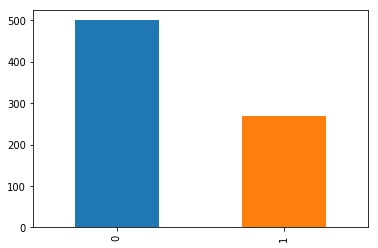

In [46]:
pima_df['class'].value_counts().plot(kind='bar')

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


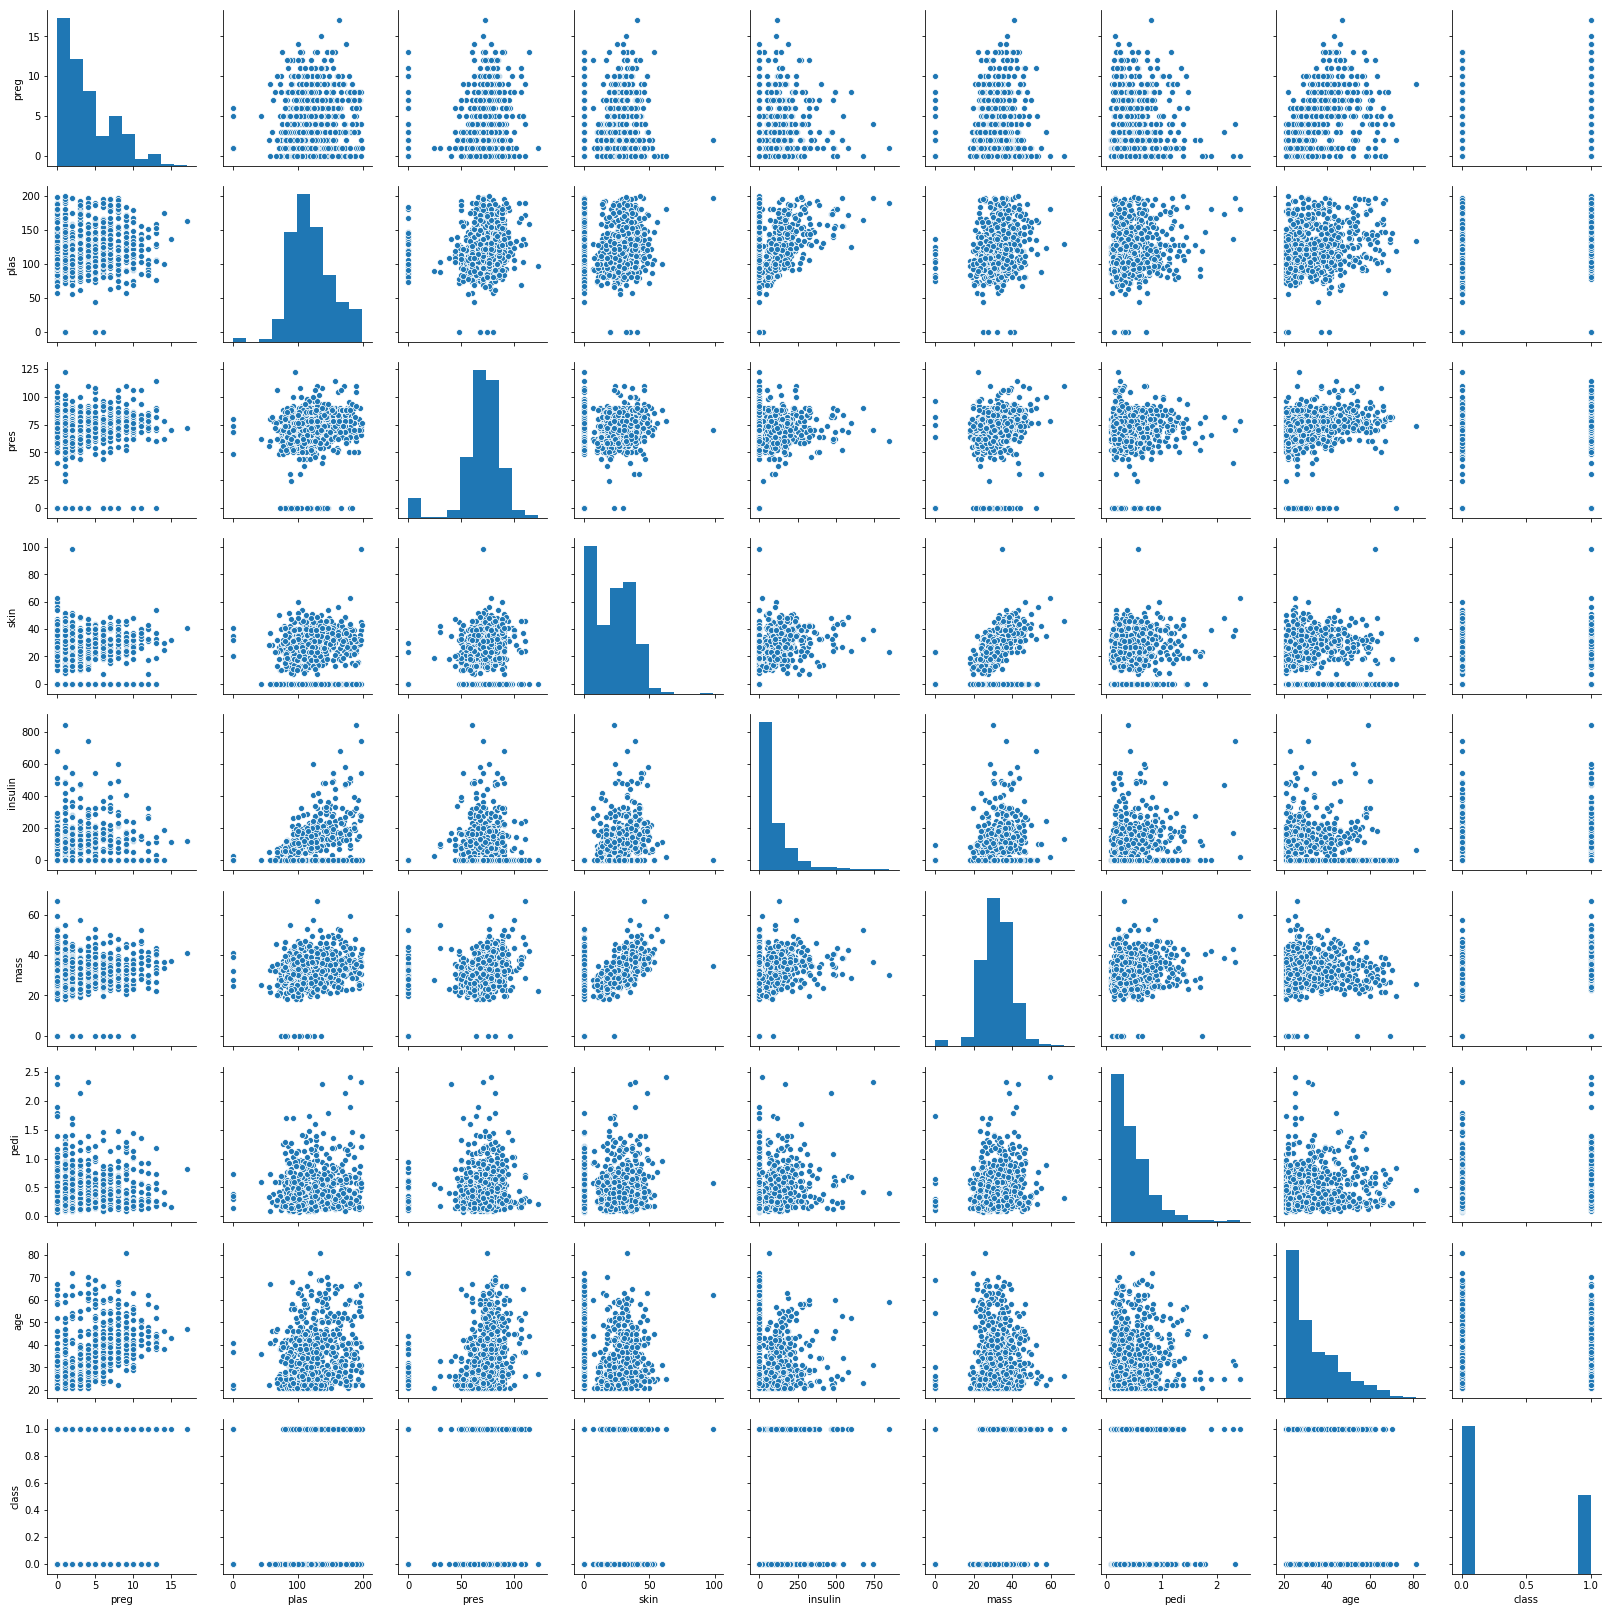

In [47]:
# Pairplot using sns
sns.pairplot(pima_df)

Using the plot - infer the relationship between different variables

In [49]:
pima_df.corr()

,preg,plas,pres,skin,insulin,mass,pedi,age,class
preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [ ]:
# relationship between different variables
# There is good positive corelation between preg & age, skin & insulin, plasma & insulin
# There is negative correlation between age & skin , age insulin
# There is no relation between 

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [108]:
X = pima_df.drop("class", axis=1)
y = pima_df["class"]
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [109]:
model_DT = DecisionTreeClassifier(criterion = 'entropy',random_state=0)
model_DT.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

# Q10 Print the accuracy of the model & print the confusion matrix 

In [110]:
y_predictDT = model_DT.predict(X_test)
DT_accuracy = metrics.accuracy_score(y_test,y_predictDT)
print("Decision Tree Accuracy is: ", DT_accuracy)

Decision Tree Accuracy is:  0.7619047619047619


In [57]:
confusion_matrix = metrics.confusion_matrix(y_test,y_predict)
print(confusion_matrix)

[[119  28]
 [ 27  57]]


Print the feature importance of the decision model - Optional

In [58]:
cr = metrics.classification_report(y_test,y_predict)
print(cr)

              precision    recall  f1-score   support

           0       0.82      0.81      0.81       147
           1       0.67      0.68      0.67        84

   micro avg       0.76      0.76      0.76       231
   macro avg       0.74      0.74      0.74       231
weighted avg       0.76      0.76      0.76       231



In [ ]:
# Using Decision Tree Classifier we can predict whether the Pima Indian women shows signs of diabetes or not 
# with 76.19% accuracy.

In [60]:
print(model.feature_importances_)

[0.07284359 0.27635683 0.09356353 0.06910971 0.01972815 0.18705009
 0.17225835 0.10908976]


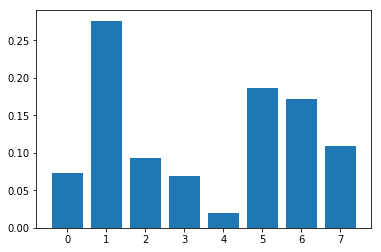

In [63]:
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

# Q12 Apply the Random forest model and print the accuracy of Random forest Model

In [89]:
X = pima_df.drop("class", axis=1)
y = pima_df["class"]
sc = StandardScaler()
X = sc.fit_transform(X)
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
RF_model = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0 )
RF_model.fit(X_train,y_train)

C:\Users\Mangesh Karande\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Mangesh Karande\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [91]:
Y_predictRF = RF_model.predict(X_test)
RF_accuracy = metrics.accuracy_score(y_test,Y_predictRF)
print("RF Accuracy is: ",RF_accuracy)

RF Accuracy is:  0.7662337662337663


In [92]:
confusion_matrix = metrics.confusion_matrix(y_test,Y_predictRF)
print(confusion_matrix)

[[125  22]
 [ 32  52]]


# Q13 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [94]:
X = pima_df.drop("class", axis=1)
y = pima_df["class"]
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
AB_model = AdaBoostClassifier(base_estimator=RF_model,n_estimators=50,random_state=2)
AB_model.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
          learning_rate=1.0, n_estimators=50, random_state=2)

In [95]:
Y_predictAB = AB_model.predict(X_test)
AB_accuracy = metrics.accuracy_score(y_test,Y_predictAB)
print("AB Accuracy is: ",AB_accuracy)

AB Accuracy is:  0.7532467532467533


# Q14 - Apply Bagging Classifier Algorithm and print the accuracy.

In [100]:
X = pima_df.drop("class", axis=1)
y = pima_df["class"]
sc=StandardScaler()
sc.fit_transform(X)
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
BG_model = BaggingClassifier(n_estimators=31,random_state=2)
BG_model.fit(X_train,y_train)

C:\Users\Mangesh Karande\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Mangesh Karande\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=31, n_jobs=None, oob_score=False, random_state=2,
         verbose=0, warm_start=False)

In [101]:
Y_predictBG = BG_model.predict(X_test)
BG_accuracy = metrics.accuracy_score(y_test,Y_predictBG)
print("Bagging Accuracy is: ",BG_accuracy)

Bagging Accuracy is:  0.7489177489177489


# Q15 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [103]:
X = pima_df.drop("class", axis=1)
y = pima_df["class"]
sc=StandardScaler()
sc.fit_transform(X)
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
GB_model=GradientBoostingClassifier(n_estimators=50,random_state=2)
GB_model.fit(X_train,y_train)

C:\Users\Mangesh Karande\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Mangesh Karande\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              n_iter_no_change=None, presort='auto', random_state=2,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [104]:
Y_predictGB = GB_model.predict(X_test)
GB_accuracy = metrics.accuracy_score(y_test,Y_predictGB)
print("Gradient Boosting Accuracy is: ",GB_accuracy)

Gradient Boosting Accuracy is:  0.7922077922077922


# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.

In [118]:
from sklearn.ensemble import VotingClassifier
model_stacked = VotingClassifier(estimators = [('Decision Tree',model_DT),('RF', RF_model), ('AdaBoost', AB_model), ('Bagging', BG_model), ('Gradient', GB_model)],voting='soft')

In [119]:
model_stacked.fit(X_train,y_train)

VotingClassifier(estimators=[('Decision Tree', DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight...    subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None)

In [120]:
Y_predictStack = model_stacked.predict(X_test)
Stacked_accuracy = metrics.accuracy_score(y_test,Y_predictStack)
print("Stacked Accuracy is: ",Stacked_accuracy)

Stacked Accuracy is:  0.7662337662337663
